# SLO Twitter Data Analysis  - Tweet @User Mentions Statistics

Setup Jupyter Notebook kernel for SLO data analysis.<br>

In [1]:
import logging as log
import warnings
import time
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Import custom utility functions.
import slo_twitter_data_analysis_utility_functions as tweet_util_v2

#############################################################
# Adjust parameters to display all contents.
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 1000
# Seaborn setting.
sns.set()
# Set level of precision for float value output.
pd.set_option('precision', 12)
# Ignore these types of warnings - don't output to console.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Matplotlib log settings.
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

"""
Turn debug log statements for various sections of code on/off.
(adjust log level as necessary)
"""
log.basicConfig(level=log.INFO)


# Import CSV dataset and convert to dataframe.
tweet_dataframe = tweet_util_v2.import_dataset(
    "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/"
    "twitter-dataset-6-27-19.csv",
    "csv", False)

d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\IPython\core\interactiveshell.py:3209: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


## Tweets with User Mentions and are Replies to other Tweets:

<span style="font-family:Papyrus; font-size:1.25em;">

Percent stats for entire dataset.<br>

</span>

In [2]:
    print("Percentage of Tweets with User Mentions:")
    print(f"(Number of Tweets with User Mentions divided by Number of Tweets in Dataset)")
    print(tweet_dataframe['tweet_entities_user_mentions_name'].count() / len(tweet_dataframe))

    print("Percentage of Tweets that are Replies to Other Tweets:")
    print(f"(Number of Tweets that are Replies to Another Tweet divided by Number of Tweets in Dataset)")
    print(tweet_dataframe['tweet_in_reply_to_status_id'].count() / len(tweet_dataframe))

Percentage of Tweets with User Mentions:
(Number of Tweets with User Mentions divided by Number of Tweets in Dataset)
0.7985257069044469
Percentage of Tweets that are Replies to Other Tweets:
(Number of Tweets that are Replies to Another Tweet divided by Number of Tweets in Dataset)
0.058935925527614653


<span style="font-family:Papyrus; font-size:1.25em;">

It seems almost 80% Tweets have user mentions.<br>

Very few Tweets are replies to other Tweets.<br>

</span>

## Graph of User Mentions Count by Associated Tweets for a Given Company:

<span style="font-family:Papyrus; font-size:1.25em;">

Code computes the # of user mentions for every Tweet and the percentage of all Tweets associated with a particular company that have that # of user mentions.<br>

</span>


User Mentions Count by Percentage of All Tweets for a Given Company:


<Figure size 432x288 with 0 Axes>

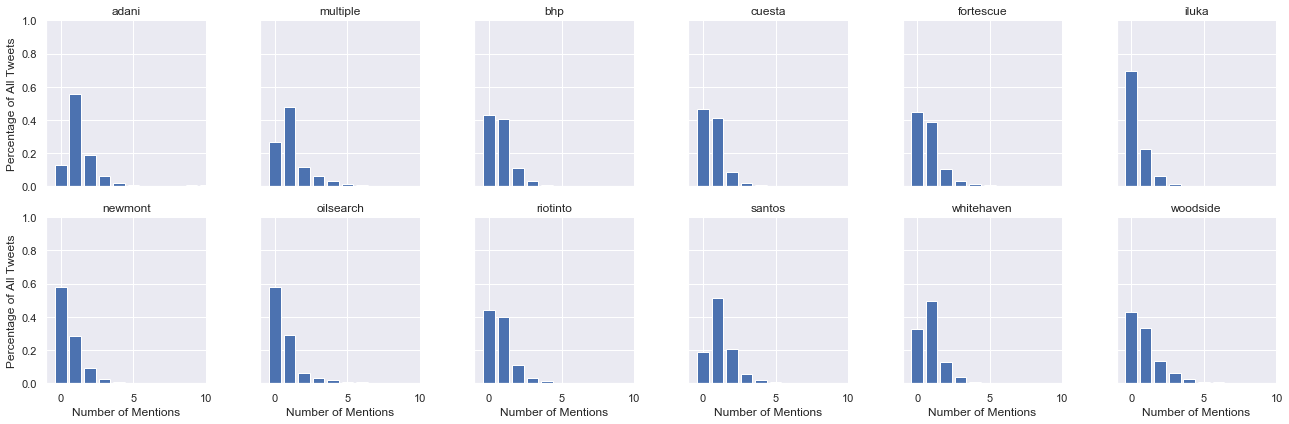

In [3]:
    #######################################################
    def compute_number_of_mentions(row):
        """
        Helper function to compute # of mentions because Shuntaro's method does not work on our dataset.

        :param row: string containing contents of field "tweet_entities_user_mentions_id"
        :return:
        """
        if row == "[]":
            return 0
        elif row.count(',') == 0:
            return 1
        count = row.count(',')
        return count + 1

    print(f"\nUser Mentions Count by Percentage of All Tweets for a Given Company:")
    tweet_dataframe["#mentions"] = tweet_dataframe['tweet_entities_user_mentions_id'].apply(
        lambda x: compute_number_of_mentions(x))
    # print(tweet_dataframe["num_mentions"].head(10))
    #######################################################

    # print(f"\nUser Mentions Count by Percentage of All Tweets for a Given Company:")
    # tweet_dataframe['#mentions'] = tweet_dataframe['tweet_entities_user_mentions_id']. \
    #     apply(lambda x: len(x) if isinstance(x, list) else 0)

    plt.figure()
    grid = sns.FacetGrid(tweet_dataframe[['#mentions', 'company_derived_designation']],
                         col='company_derived_designation', col_wrap=6, ylim=(0, 1), xlim=(-1, 10))
    grid.map_dataframe(tweet_util_v2.bar_plot, '#mentions')
    grid.set_titles('{col_name}')
    grid.set_xlabels("Number of Mentions").set_ylabels("Percentage of All Tweets")
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

Most Tweets have either no user mentions or one user mention.  Having multiple user mentions is rarer.<br>

</span>

## Statistics for Most Mentioned Users by Company:

<span style="font-family:Papyrus; font-size:1.25em;">

Left column displays the company name.  Middle column displays the @user ID.  Right column displays the user mentions count.

</span>

In [4]:
    # FIXME - this last part is functioning incorrectly.  Adjust lambda function.
    print(f"Mention Counts for Top (Most) Mentioned Users by Company they are Associated With")
    print(f"Top (highest) Mentions Count for a Given Company by the ID of the User that has been Mentioned")
    print(
        tweet_dataframe[['company_derived_designation', 'tweet_entities_user_mentions_id']].groupby(
            'company_derived_designation').apply(
            lambda x: pd.Series([mention
                                 for mentions in x['tweet_entities_user_mentions_id'] if mentions is not None
                                 for mention in mentions]).value_counts(normalize=False).head()))

Mention Counts for Top (Most) Mentioned Users by Company they are Associated With
Top (highest) Mentions Count for a Given Company by the ID of the User that has been Mentioned
company_derived_designation   
adani                        2    801878
                             8    783930
                             1    742073
                             3    740996
                             4    728456
bhp                          ]     64347
                             [     64347
                             2     63635
                             1     56951
                             0     50356
cuesta                       [       618
                             ]       618
                             1       610
                             2       565
                             3       513
fortescue                    7     12451
                             [     11772
                             ]     11772
                             8     11738
             

<span style="font-family:Papyrus; font-size:1.25em;">

**FIXME: Code is not intepreting list of user mentions ID's correctly.  Modify lambda function to fix.**

</span>